# **Free Fall Simulation of 20-Peso Coins on Different Planets in Our Solar System**

## Introduction
### The study of free fall is an essential part of understanding gravitational forces and their effect on objects. Objects of the same mass, such as a coin, will fall at different rates depending on the planet's gravitational pull. Gravitational acceleration is a key factor in determining the speed at which an object falls toward the surface of a celestial body. On Earth, we are accustomed to the acceleration due to gravity being approximately 9.81 m/s². However, this value varies greatly across different planets in our solar system, influencing the rate at which objects fall.

## Planets in the Simulation:
- **Mercury**: Gravity = 3.7 m/s²
- **Venus**: Gravity = 8.87 m/s²
- **Earth**: Gravity = 9.8 m/s²
- **Mars**: Gravity = 3.71 m/s²
- **Jupiter**: Gravity = 24.79 m/s²
- **Saturn**: Gravity = 10.44 m/s²
- **Uranus**: Gravity = 8.69 m/s²
- **Neptune**: Gravity = 11.15 m/s²
- **Pluto**: Gravity = 0.62 m/s²
- 

### How the Simulation Works:
The simulation uses the following formula to calculate the fall:

### 1. Equation for height (yf)
# $$ y_f = y_0 + v_0 t + \frac{1}{2} g t^2 $$

### Where: 
+ yf is the height of the object at any given time
+ y0 is the initial height (50 meters in this case),
+ v0 is the initial velocity (0 m/s, since the coin is initially at rest)
+ g is the gravitational acceleration for the planet
+ t is the time in seconds.


### 2. Equation for velocity (vf):
# $$ v_f =  v_0 +  g  - t$$




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Planetary gravities (m/s^2)
planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
}

# Simulation constants
v0 = 0  # Initial velocity (m/s)
y0 = 50  # Initial height (m)
dt = 0.5  # Time step (s)

# Create motion data for each planet
data = []
planet_data = {}

for planet, gravity in planetary_gravity.items():
    t = 0
    y = y0
    v = v0
    max_time = 20  # Maximum simulation time in seconds

    times = []  # Store time values
    heights = []  # Store height values

    while y > 0 and t <= max_time:
        # Update velocity and position based on free fall formula
        v = v0 - gravity * t  # Velocity formula: v = v0 + g * t
        y = y0 - 0.5 * gravity * t**2  # Height formula: y = y0 + 0.5 * g * t^2
        
        if y < 0:
            y = 0
        
        times.append(t)
        heights.append(y)

        t += dt  # Update time step
    
    # After loop ends, we have the final time, final velocity, and gravity
    final_time = times[-1]  # Correct final time: last time value when the object hits the ground
    final_velocity = v  # Final velocity at the time the object hits the ground

    # Store the planet data for the table
    data.append([planet, v0, gravity, final_time, final_velocity])

    # Store the data for plotting
    planet_data[planet] = {"time": times, "height": heights}

# Create a DataFrame to represent the results as a table
df = pd.DataFrame(data, columns=["Planet", "Initial Velocity (m/s)", "Gravity (m/s²)", "Final Time (s)", "Final Velocity (m/s)"])

# Display the table
print(df)


    Planet  Initial Velocity (m/s)  Gravity (m/s²)  Final Time (s)  \
0  Mercury                       0            3.70             5.5   
1    Venus                       0            8.87             3.5   
2    Earth                       0            9.81             3.5   
3     Mars                       0            3.71             5.5   
4  Jupiter                       0           24.79             2.5   
5   Saturn                       0           10.44             3.5   
6   Uranus                       0            8.69             3.5   
7  Neptune                       0           11.15             3.0   

   Final Velocity (m/s)  
0               -20.350  
1               -31.045  
2               -34.335  
3               -20.405  
4               -61.975  
5               -36.540  
6               -30.415  
7               -33.450  


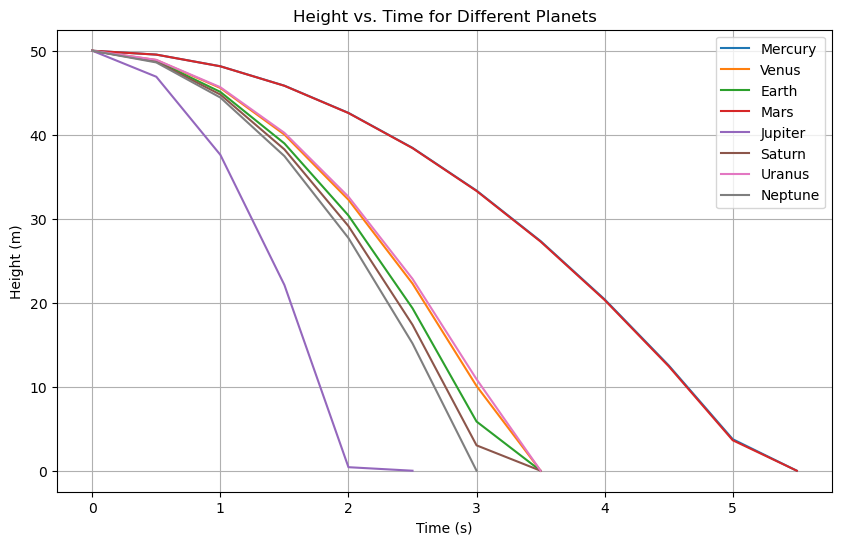

In [2]:
# Plot graph of height vs time for each planet
def plot_graph(planet_data):
    """Plot height vs. time for all planets."""
    plt.figure(figsize=(10, 6))
    plt.title("Height vs. Time for Different Planets")
    plt.xlabel("Time (s)")
    plt.ylabel("Height (m)")

    for planet, data in planet_data.items():
        plt.plot(data["time"], data["height"], label=planet)

    plt.legend()
    plt.grid()
    plt.show()

# Call the plot_graph function to display the graph
plot_graph(planet_data)

In [3]:
import pygame

# Initialize Pygame
pygame.init()

# Set up display
screen_width = 800
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Piso Coin Falling on Planets")

# Define colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
PISO_COIN_COLOR = (255, 223, 0)  # Yellow for Piso Coin
PLANET_LABEL_COLOR = (255, 255, 255)  # White for labels

# Create Piso Coin object
class PisoCoin(pygame.sprite.Sprite):
    def __init__(self, x, y, gravity, max_time):
        super().__init__()
        self.image = pygame.Surface((30, 30))
        self.image.fill(PISO_COIN_COLOR)
        self.rect = self.image.get_rect()
        self.rect.center = (x, y)
        self.gravity = gravity
        self.max_time = max_time
        self.velocity = 0
        self.time_elapsed = 0

    def update(self):
        """Make the Piso Coin fall according to the planet's gravity."""
        if self.time_elapsed < self.max_time:
            self.velocity += self.gravity * 0.1  # Update velocity based on gravity
            self.rect.y += self.velocity  # Update position based on velocity
            self.time_elapsed += 0.5  # Increment time by dt

        # Stop falling when it reaches the ground (or bottom of screen)
        if self.rect.y >= screen_height - 30:
            self.rect.y = screen_height - 30  # Stop at the bottom
            self.velocity = 0  # Stop falling

# Initialize planets and coins
coins = pygame.sprite.Group()
planet_positions = [(100, 100), (200, 150), (300, 200), (400, 250), (500, 300), (600, 350), (700, 400), (750, 450)]

# Create a coin for each planet
for idx, (planet, gravity) in enumerate(planetary_gravity.items()):
    max_time = planet_data[planet]["time"][-1]  # Get the final time for the planet's fall
    coin = PisoCoin(planet_positions[idx][0], planet_positions[idx][1], gravity, max_time)
    coins.add(coin)

# Set up fonts for planet labels
font = pygame.font.SysFont("Arial", 20)

# Main game loop
running = True
clock = pygame.time.Clock()

while running:
    screen.fill(BLACK)

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # Update coins
    coins.update()

    # Draw all coins and planet labels
    for idx, (planet, gravity) in enumerate(planetary_gravity.items()):
        coin = list(coins)[idx]
        # Draw the coin
        screen.blit(coin.image, coin.rect)

        # Draw planet label
        label = font.render(planet, True, PLANET_LABEL_COLOR)
        screen.blit(label, (coin.rect.centerx - label.get_width() // 2, coin.rect.top - 20))
    
    # Update display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(60)

# Quit Pygame
pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
